<a href="https://colab.research.google.com/github/ksumesh21/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Calculating the cost function#

This function is to calcuate the cost function. The formula for calculating the cost function in linear regression is to  \begin{align}
\frac{1}{2m}\sum_{n=1}^m (h_{w,b}(x)-y)^2
\end{align} 



In [2]:
def get_cost(y,y_pred):
    m=y.shape[0]
    return (1/(2*m))*np.sum(np.square(y_pred-y))

#Gradient Descent 

Gradient descent is performed to find the optimal value for weights 'w' and bias 'b'

Formula for performing Gradient Descent

\begin{align}
w^i=w^i-α*\frac{1}{2m}\sum_{n=1}^m(h_{w,b}(x)-y)*x^i
\end{align}
\begin{align}
b=b-α*\frac{1}{2m}\sum_{n=1}^m(h_{w,b}(x)-y)
\end{align}

α is the learning rate

We are using matric operation below for parallel operations

In [3]:
def gradient_descent(x,y,y_pred,w,b,alpha):
    m=y.shape[0]
    y_diff=y_pred-y
    w=w-alpha*(1/m)*np.matmul(y_diff,x)
    b=b-alpha*(1/m)*np.sum(y_diff)
    return w,b


In [4]:
import matplotlib.pyplot as plt
def linear_regression(x,y):
    shape=x.shape
    alpha=0.1
    weight_history=[]
    cost_history=[]
    w=np.zeros(shape[1])
    b=np.array([0])
    y_pred=np.matmul(x,w.T)+b
    
    for i in range(1000):
        cost=get_cost(y,y_pred)
        weight_history.append(i)
        cost_history.append(cost)     
        w,b=gradient_descent(x,y,y_pred,w,b,alpha)
        y_pred=np.matmul(x,w.T)+b
        
        
   
    plt.plot(weight_history,cost_history)
    return w,b

[0.36408812 0.08919985 0.27826694 0.14501862 0.11151316] [4.92164922e-17]


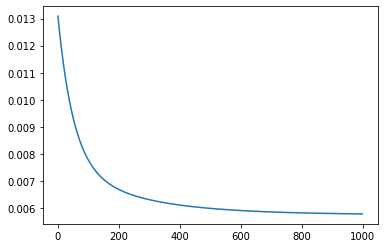

In [6]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df_n=df[["area","bedrooms","bathrooms","stories","parking"]]
df_n=(df_n-df_n.mean())/(df_n.max()-df_n.min())
x=df_n.to_numpy()
y=(df['price']-df['price'].mean())/(df['price'].max()-df['price'].min())
w,b=linear_regression(x,y)
print(w,b)

# New section